<a href="https://colab.research.google.com/github/RV05/Chinese-automobile-company-Geely-Auto-dataset-analysis/blob/main/Regularized_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://)# <b> <u>Problem Statement</u></b>

### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

### They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know: 

* ### Which variables are significant in predicting the price of a car
* ### How well those variables describe the price of a car
* ### Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# <b><u> Business Goal</u></b>
### We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/alma/Copy of CarPrice_project.csv')

In [3]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
dataset['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [6]:
dataset.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [7]:
len(dataset[dataset.duplicated()])

0

In [8]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

#EDA

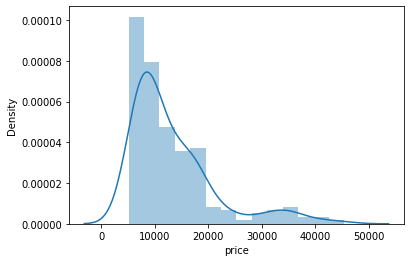

In [9]:
#dependent variable-price
sns.distplot(dataset['price'])

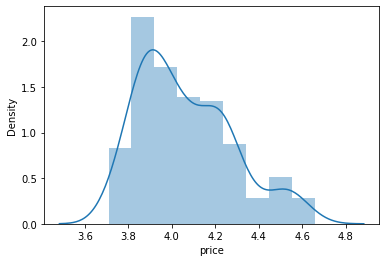

In [10]:
sns.distplot(np.log10(dataset['price']))

In [11]:
numeric_features=dataset.describe().columns

In [12]:
dataset.symboling.unique()

array([ 3,  1,  2,  0, -1, -2])

In [13]:
dataset.describe().columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [14]:
dataset.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

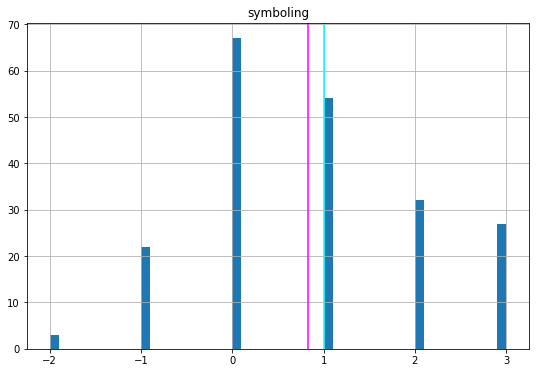

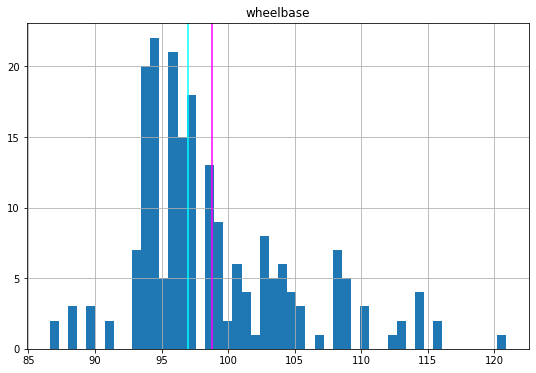

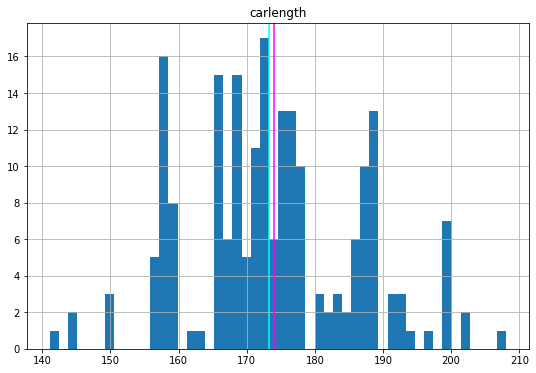

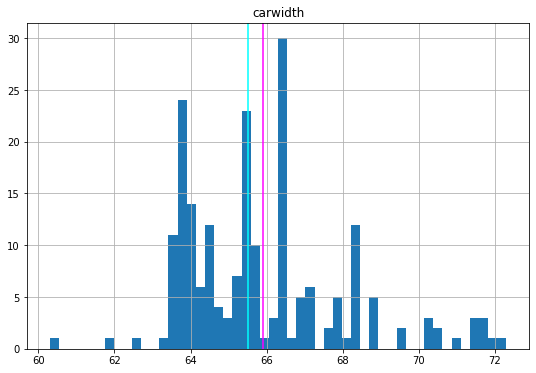

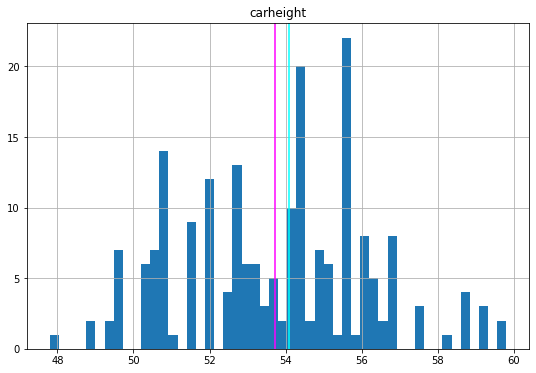

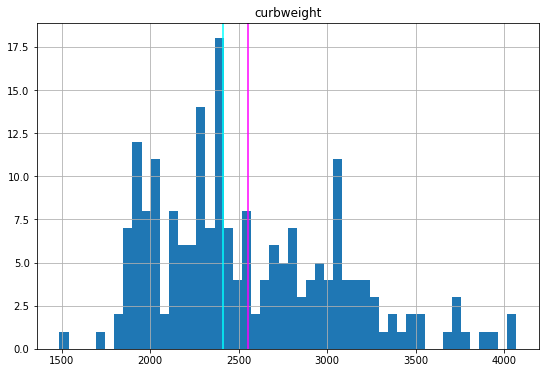

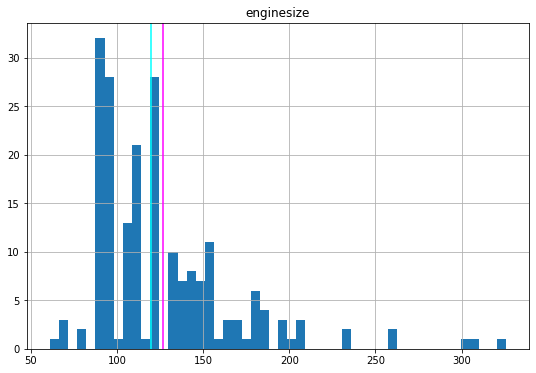

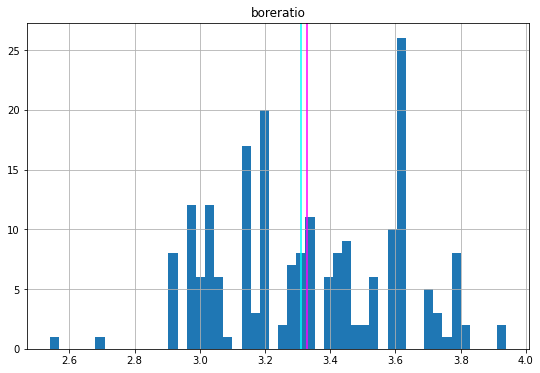

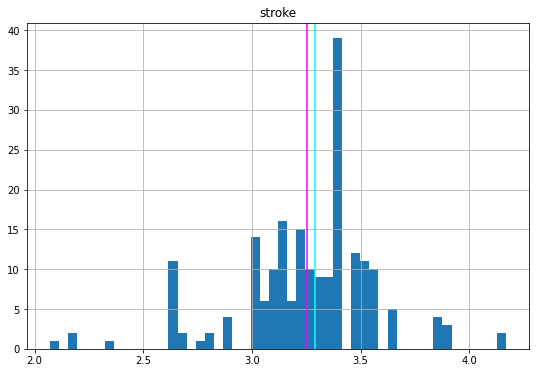

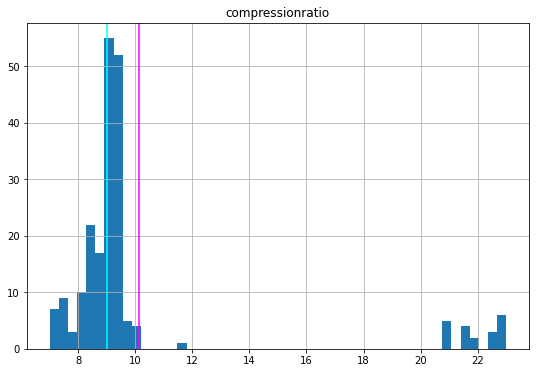

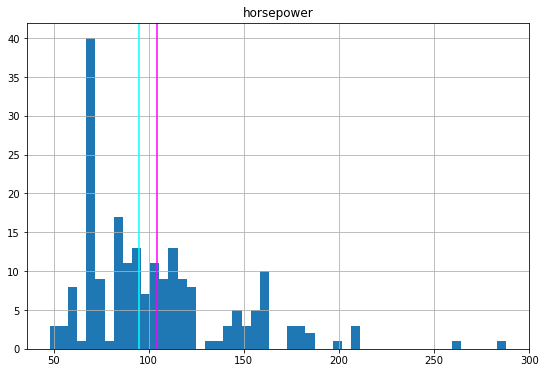

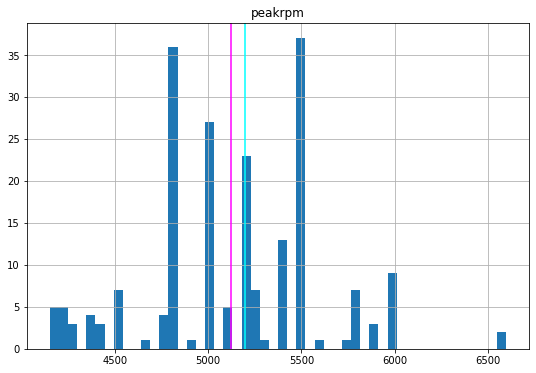

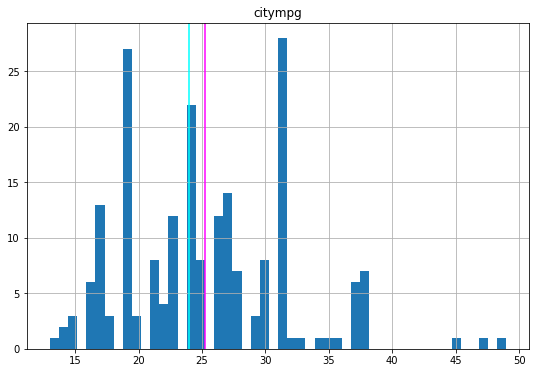

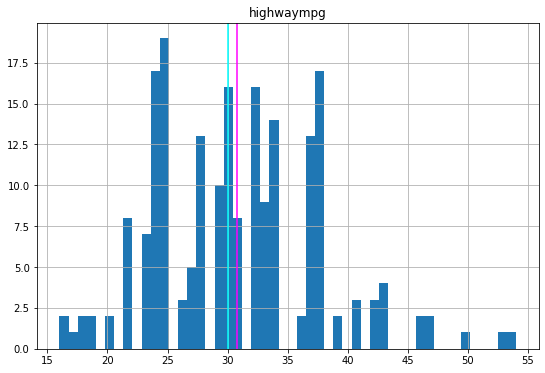

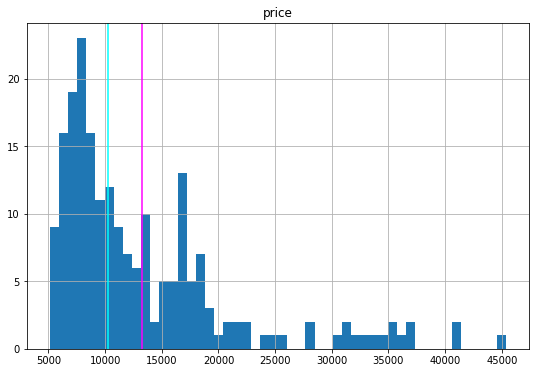

In [15]:
for col in numeric_features[1:]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=(dataset[col])
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(),color='magenta')
  ax.axvline(feature.median(),color='cyan')
  ax.set_title(col)
plt.show()

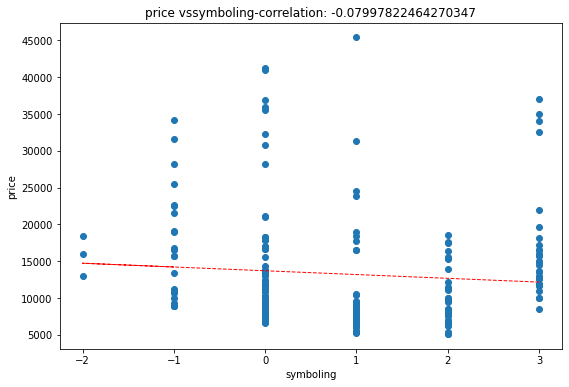

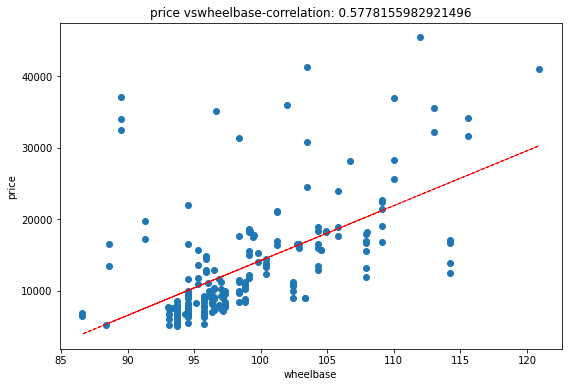

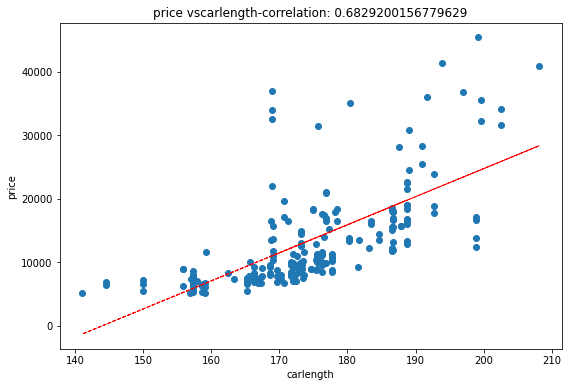

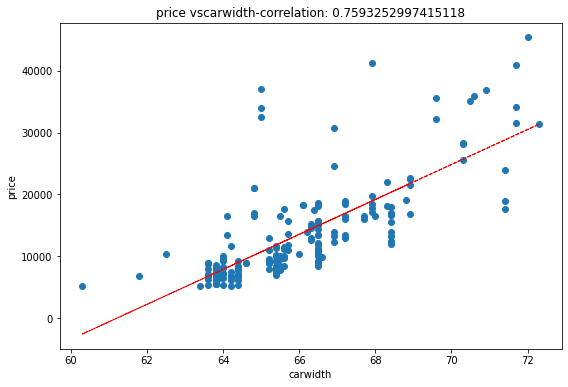

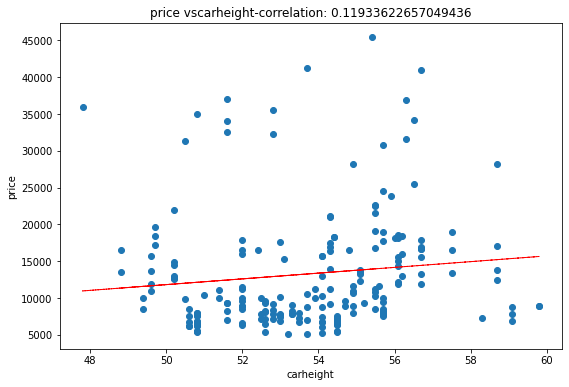

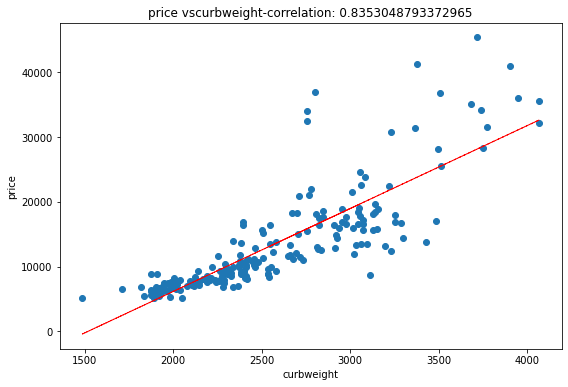

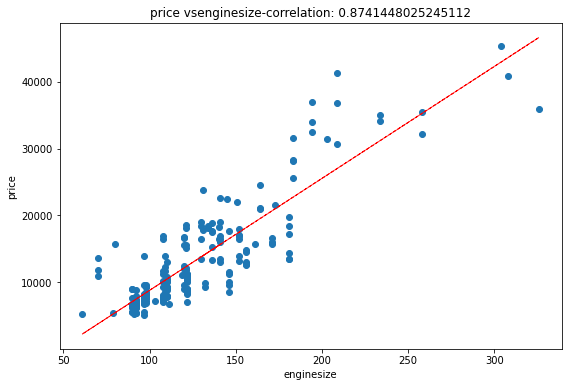

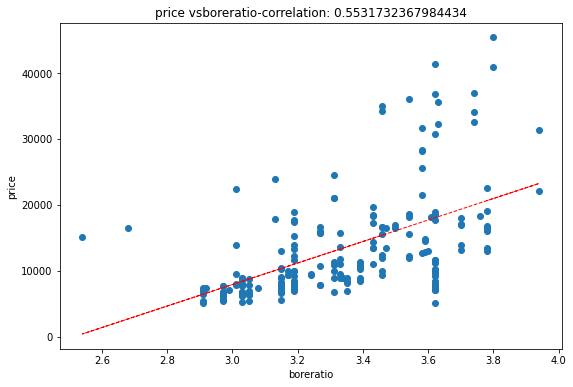

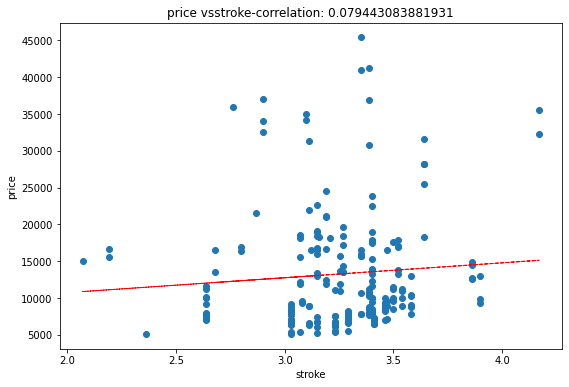

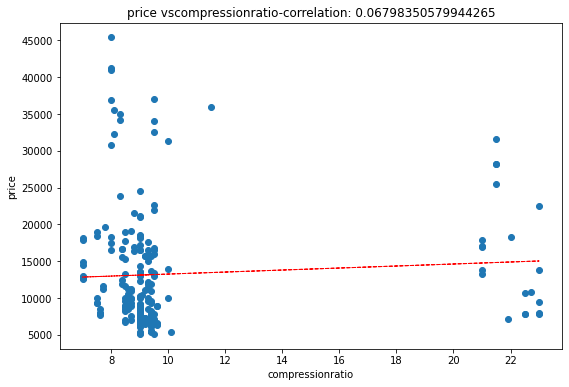

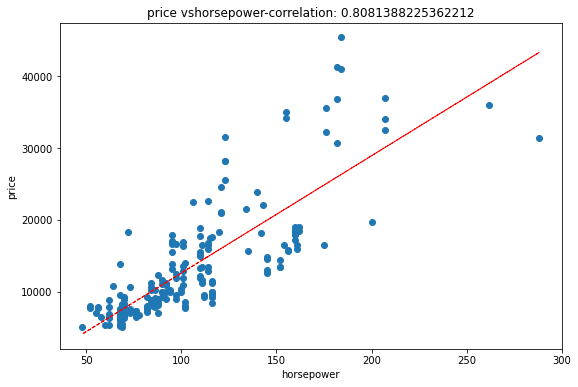

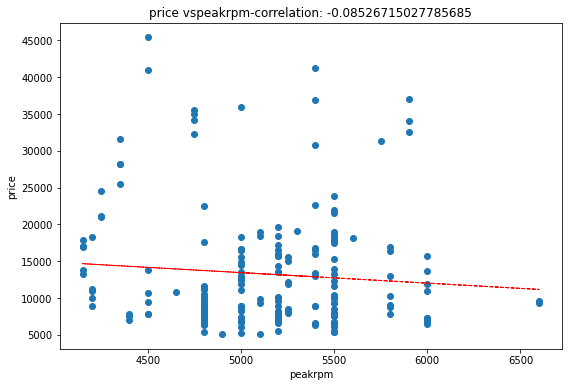

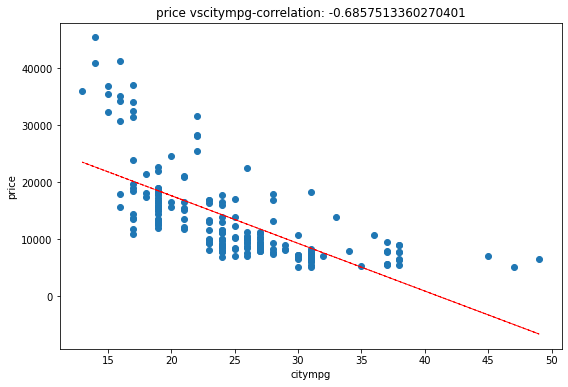

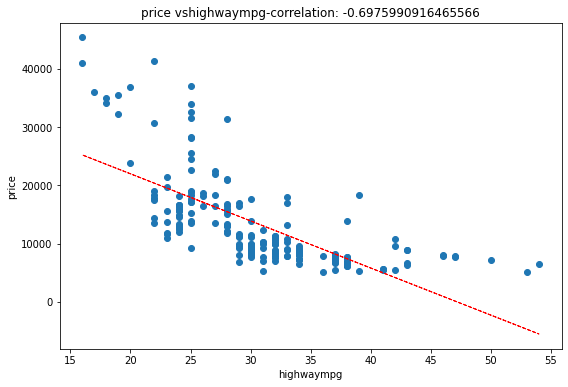

In [16]:
  for col in numeric_features[1:-1]:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    feature=(dataset[col])
    label=dataset['price']
    correlation=feature.corr(label)
    plt.scatter(x=feature,y=label)
    plt.xlabel(col)
    plt.ylabel('price')
    ax.set_title('price vs'+col+'-correlation: '+str(correlation))
    z=np.polyfit(dataset[col],dataset['price'],1)
    y_hat=np.poly1d(z)(dataset[col])
    plt.plot(dataset[col],y_hat,"r--",lw=1)
plt.show()

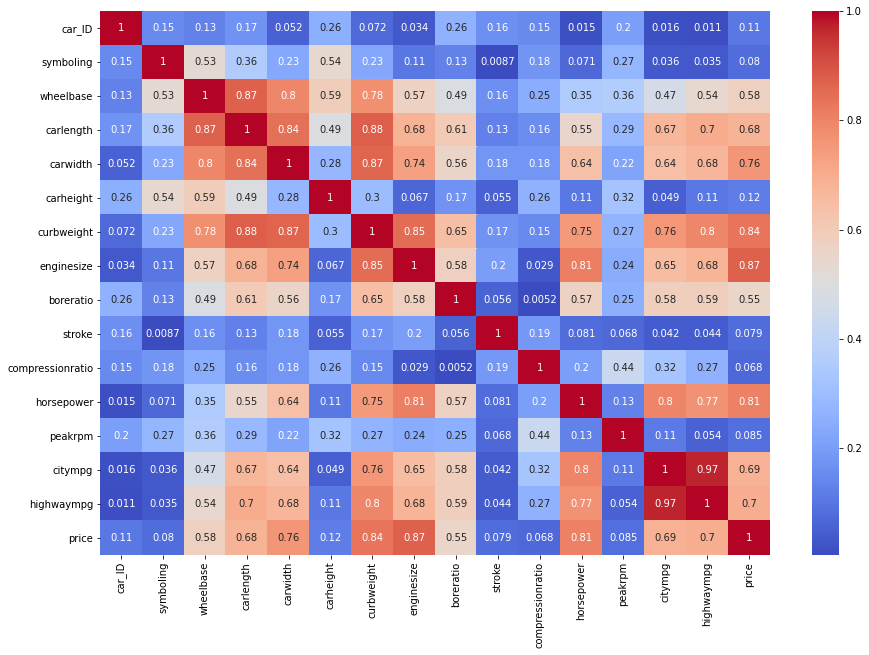

In [17]:
plt.figure(figsize=(15,10))
correlation=dataset.corr()
sns.heatmap(abs(correlation),annot=True,cmap='coolwarm')

In [18]:
#multicollinaerity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [19]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['car_ID','symboling','price','citympg','highwaympg','company_cat','price_mean','carwidth','carlength','carheight','car_vol','car_den','wheelbase','car_area','peakrpm','stroke','horsepower','car_density','boreratio','curbweight']]])

,variables,VIF
0,enginesize,4.749302
1,compressionratio,4.749302


In [20]:
dataset['car_area']=dataset['carlength']*dataset['carwidth']

In [21]:
dataset['car_vol']=dataset['car_area']*dataset['carheight']

In [22]:
dataset['mileage']=0.7*dataset['citympg']+0.3*dataset['highwaympg']

In [23]:
dataset['car_density']=dataset['curbweight']*dataset['car_area']

In [24]:
numerical_features = ['enginesize','compressionratio','mileage']

In [25]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [26]:
dataset['company'] = dataset['CarName'].str.split(" ", expand=True)[0]
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})

In [27]:
dataset['company'] = dataset['company'].str.title()
dataset['company'].value_counts()

Toyota         32
Nissan         18
Mazda          17
Mitsubishi     13
Honda          13
Subaru         12
Volkswagen     12
Volvo          11
Peugeot        11
Dodge           9
Buick           8
Bmw             8
Audi            7
Plymouth        7
Saab            6
Porsche         5
Isuzu           4
Chevrolet       3
Alfa-Romero     3
Jaguar          3
Renault         2
Mercury         1
Name: company, dtype: int64

In [28]:
categorical_features = dataset.describe(include=['object','category']).columns

In [29]:
dataset.describe(include=['object','category']).columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'company'],
      dtype='object')

In [30]:
dataset.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

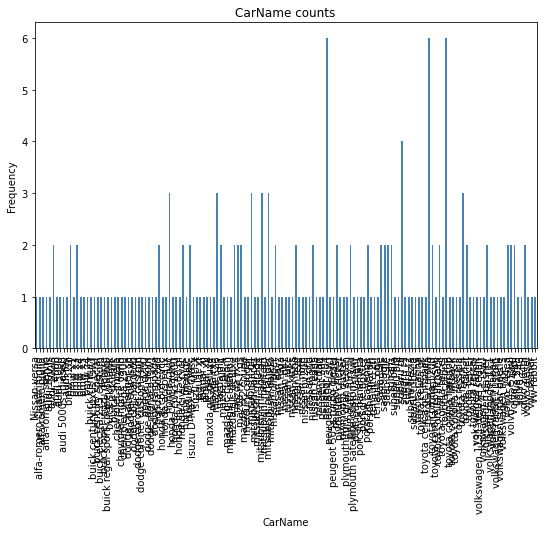

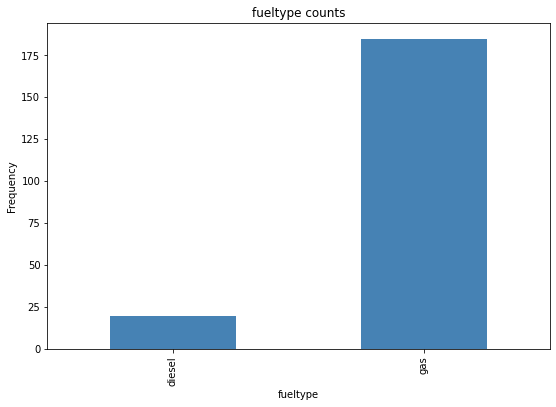

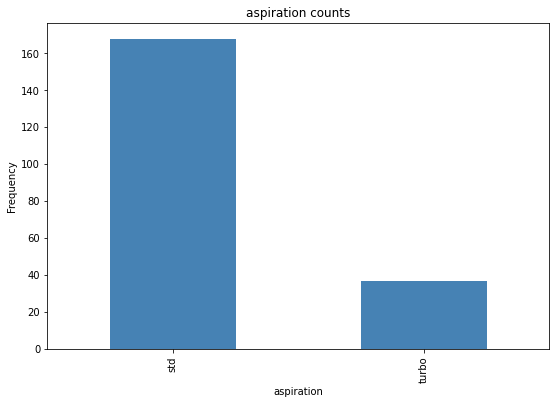

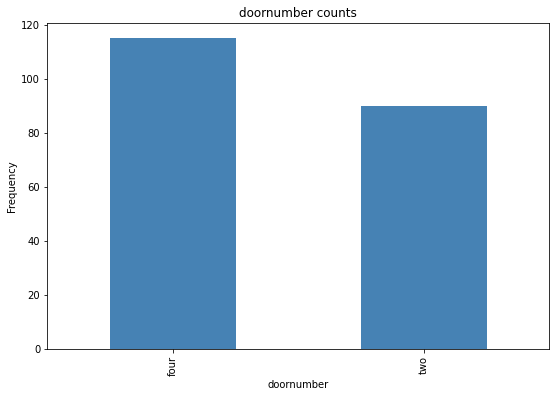

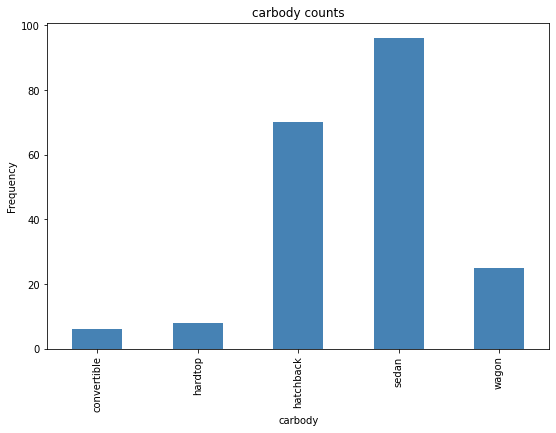

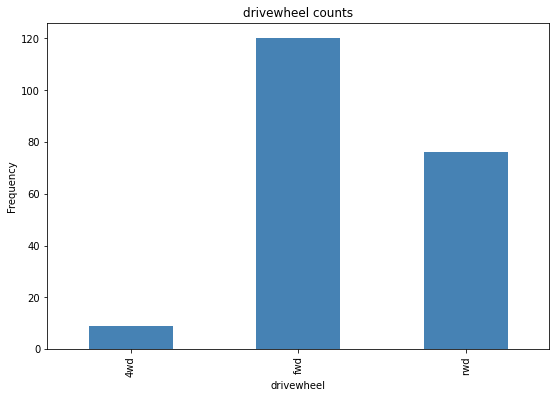

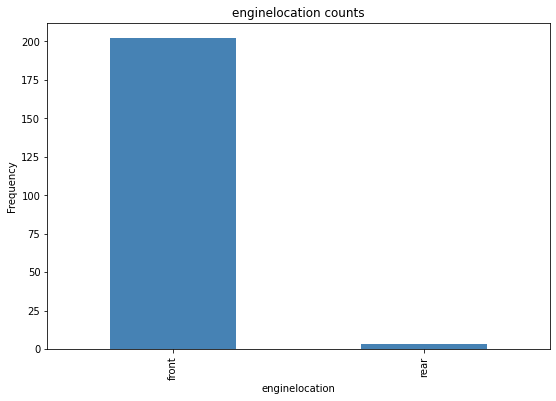

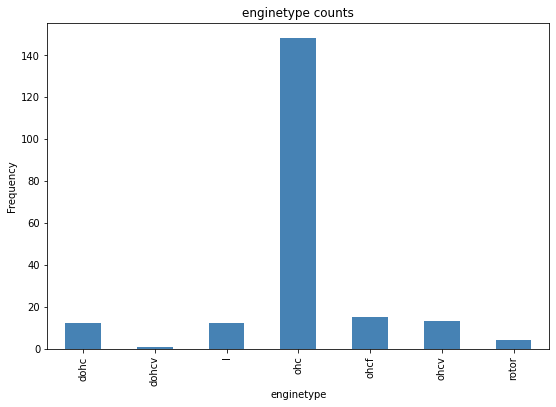

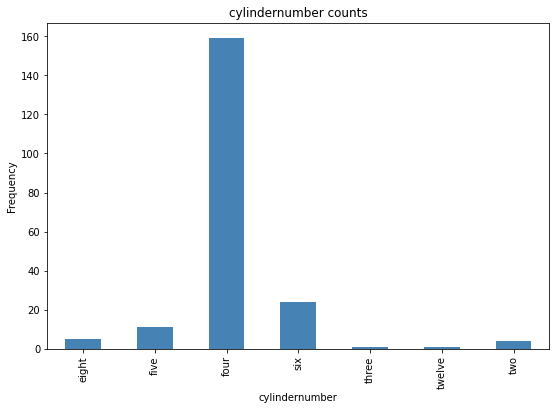

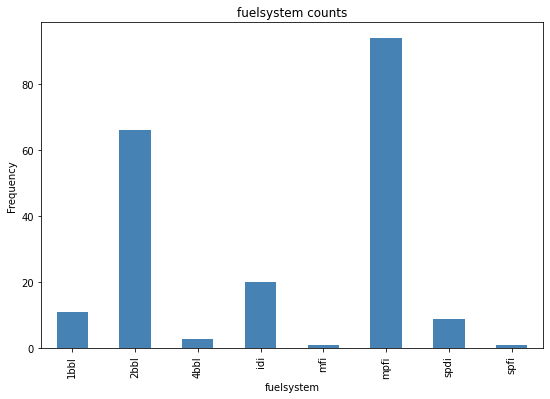

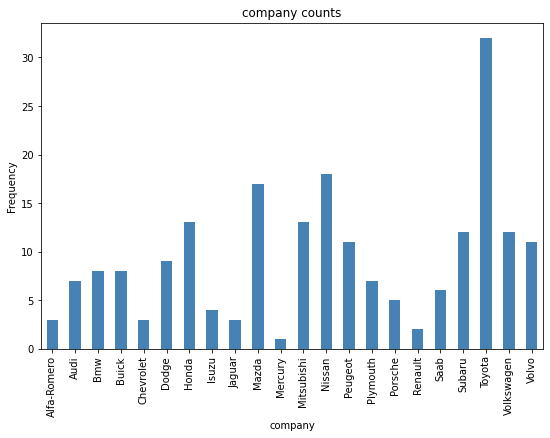

In [31]:
# plot a bar plot for each categorical feature count  

for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

<Figure size 1440x432 with 0 Axes>

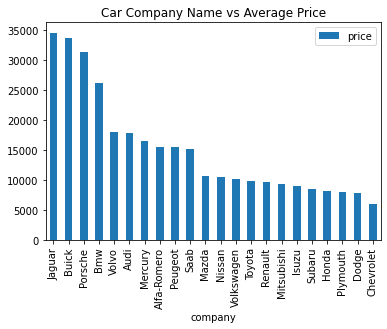

In [32]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['company'])['price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [33]:
df_autox.rename(columns={'price':'price_mean'},inplace=True)

In [34]:
df_autox

,price_mean
company,
Jaguar,34600.000000
Buick,33647.000000
Porsche,31400.500000
Bmw,26118.750000
Volvo,18063.181818
Audi,17859.166714
Mercury,16503.000000
Alfa-Romero,15498.333333
Peugeot,15489.090909


In [35]:
dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [36]:
dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [37]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_area,car_vol,mileage,car_density,company,price_mean,company_cat
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,10820.08,528019.904,22.8,27569563.84,Alfa-Romero,15498.333333,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,10820.08,528019.904,22.8,27569563.84,Alfa-Romero,15498.333333,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,11213.60,587592.640,21.1,31655992.80,Alfa-Romero,15498.333333,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,11690.92,634816.956,25.8,27321680.04,Audi,17859.166714,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,11726.24,636734.832,19.2,33114901.76,Audi,17859.166714,1


In [38]:
correlation.price

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [39]:
dataset.shape

(205, 33)

In [40]:
dataset_pr = dataset.copy()

In [41]:
dataset_pr.shape

(205, 33)

In [42]:
dataset.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

In [43]:
### Data encoding
#label encoding
encoders_nums = {"fueltype":{"diesel":1,"gas":0},
                 "aspiration":{"turbo":1,"std":0},
                 "doornumber":     {"four": 4, "two": 2},
                 "drivewheel":{"fwd":0,"4wd":0,"rwd":1},
                 "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }
                 }

dataset_pr = dataset_pr.replace(encoders_nums)

In [44]:
# One hot encoding
dataset_pr = pd.get_dummies(dataset_pr, columns=["carbody", "enginetype","fuelsystem"], prefix=["body", "etype","fsystem"])

In [45]:
dataset_pr.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_area,car_vol,mileage,car_density,company,price_mean,company_cat,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,etype_dohc,etype_dohcv,etype_l,etype_ohc,etype_ohcf,etype_ohcv,etype_rotor,fsystem_1bbl,fsystem_2bbl,fsystem_4bbl,fsystem_idi,fsystem_mfi,fsystem_mpfi,fsystem_spdi,fsystem_spfi
0,1,3,alfa-romero giulia,0,0,2,1,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,10820.08,528019.904,22.8,27569563.84,Alfa-Romero,15498.333333,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,0,0,2,1,front,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,10820.08,528019.904,22.8,27569563.84,Alfa-Romero,15498.333333,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,front,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,11213.60,587592.640,21.1,31655992.80,Alfa-Romero,15498.333333,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,0,0,4,0,front,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,11690.92,634816.956,25.8,27321680.04,Audi,17859.166714,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,0,0,4,0,front,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,11726.24,636734.832,19.2,33114901.76,Audi,17859.166714,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [46]:
dataset_pr.shape

(205, 50)

In [47]:
features = numerical_features.copy()
features.extend(['fueltype','aspiration','doornumber','drivewheel','cylindernumber','company_cat','body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon','etype_dohc', 'etype_l', 'etype_ohc', 'etype_ohcf',
       'etype_ohcv','fsystem_1bbl', 'fsystem_2bbl','fsystem_idi', 'fsystem_mpfi','fsystem_spdi'])

In [48]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

In [49]:
y = np.log10(dataset_pr['price'])

In [50]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(164, 24)
(41, 24)


# <b>Implementing Linear Regression





In [51]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,y_train)

In [52]:
reg.score(X_train,y_train)

0.9329024395361993

In [53]:
reg.coef_

array([ 0.07631416,  0.01662958, -0.0573054 ,  0.00152684,  0.02139611,
        0.01527878,  0.01259594,  0.00070597,  0.06533837,  0.01424367,
        0.00031291, -0.00027087,  0.00041203, -0.00775795, -0.04048577,
       -0.05045497, -0.06468959, -0.03595474, -0.04413501, -0.0001415 ,
       -0.01738664,  0.00152684,  0.01774035, -0.00764412])

In [54]:
y_pred=reg.predict(X_test)

In [55]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 9019828.930480279
RMSE : 3003.303003441424


In [56]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.8834893666194826
Adjusted R2 :  0.7087234165487066


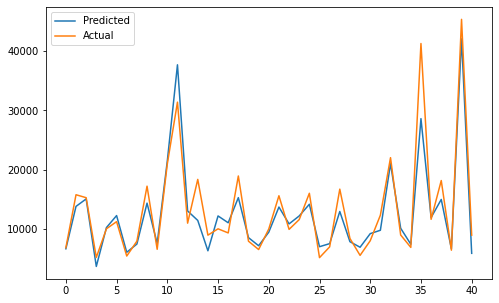

In [57]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#LASSO Regression

In [58]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
lasso.score(X_train, y_train)

0.5838126768071592

In [60]:
y_pred_l = lasso.predict(X_test)

In [61]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 40965988.89374469
RMSE : 6400.467865222408
R2 : 0.4708354947907768
Adjusted R2 :  -0.32291126302305795


In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [64]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.00503122780968867


In [65]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.00503122780968867


In [67]:
y_pred_lasso = lasso_regressor.predict(X_test)

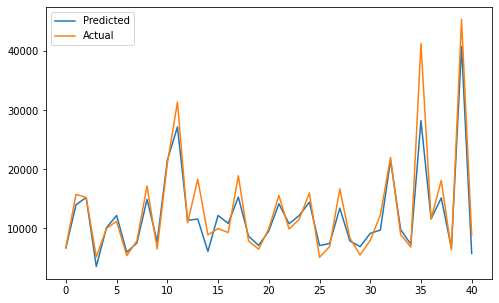

In [68]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [69]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8523463.952035753
RMSE : 2919.4972087734136
R2 : 0.8899009957614779
Adjusted R2 :  0.7247524894036946


# <b> Implementing Ridge Regression


In [70]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [71]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [72]:
ridge.score(X_train, y_train)

0.9328976360655338

In [73]:
y_pred_r = ridge.predict(X_test)

In [74]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8888825.487947538
RMSE : 2981.413337319658
R2 : 0.8851815599173998
Adjusted R2 :  0.7129538997934994


# <b> Running Grid Search Cross Validation for Ridge Regression </b>

In [75]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [76]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -0.005179034306311792


In [77]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [78]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8421420.138847552
RMSE : 2901.9683214755382
R2 : 0.8912191127012508
Adjusted R2 :  0.7280477817531269


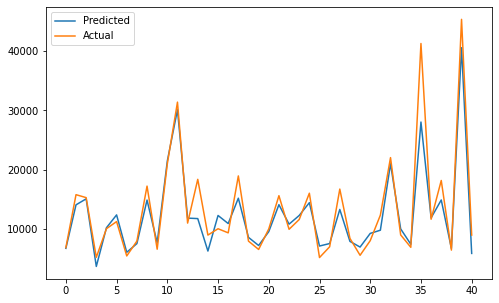

In [79]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# <b> Implementing Elastic net Regression


In [80]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [81]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
elasticnet.score(X_train, y_train)

0.8101235205668378

In [83]:
y_pred_en = elasticnet.predict(X_test)

In [84]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 19805732.06018968
RMSE : 4450.363138013535
R2 : 0.7441660585047651
Adjusted R2 :  0.36041514626191284


# <b> Running Grid Search Cross Validation for ELastic Net Regression

In [85]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [86]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [87]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.5}

Using  {'alpha': 0.01, 'l1_ratio': 0.5}  the negative mean squared error is:  -0.004768126100656389


In [88]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 8236526.276651504
RMSE : 2869.93489066416
R2 : 0.8936074175303851
Adjusted R2 :  0.7340185438259628


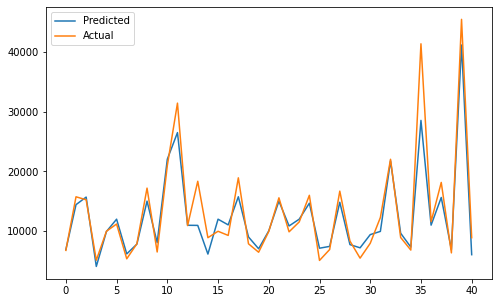

In [89]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

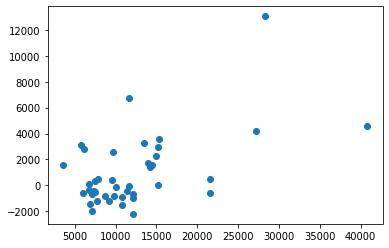

In [90]:
### Heteroscadacity
plt.scatter(10**(y_pred_lasso),10**(y_test)-10**(y_pred_lasso))

In [91]:
10**(y_pred_lasso)

array([ 6696.31346971, 14002.36547709, 15240.05251725,  3562.84097955,
       10108.85977972, 12194.56355834,  5973.02746919,  7526.9550607 ,
       14924.17638789,  7742.85376837, 21538.54962639, 27196.26967836,
       11378.95499875, 11590.03319164,  6105.85622965, 12194.56355834,
       10847.10228651, 15302.70479639,  8704.07407991,  7120.48600224,
        9563.3462372 , 14174.87228583, 10802.69211919, 12194.56355834,
       14444.36051863,  7102.23788275,  7443.43961824, 13431.24375567,
        7861.94451658,  6909.01583557,  9166.92412711,  9722.13569758,
       21545.1267198 ,  9798.22995897,  7321.5131813 , 28255.75261973,
       11616.00415317, 15166.76420655,  6697.19793161, 40808.54068307,
        5761.84954335])

In [92]:
10**(y_test)

52      6795.0
181    15750.0
5      15250.0
18      5151.0
188     9995.0
170    11199.0
76      5389.0
154     7898.0
104    17199.0
33      6529.0
12     20970.0
129    31400.5
55     10945.0
66     18344.0
45      8916.5
169     9989.0
130     9295.0
7      18920.0
37      7895.0
152     6488.0
80      9959.0
111    15580.0
131     9895.0
171    11549.0
179    15998.0
138     5118.0
156     6938.0
113    16695.0
161     8358.0
89      5499.0
183     7975.0
193    12290.0
125    22018.0
173     8948.0
92      6849.0
16     41315.0
189    11595.0
136    18150.0
22      6377.0
74     45400.0
44      8916.5
Name: price, dtype: float64